In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from binary_btsp_network_torch import BinaryBTSPNetworkTorch
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

net = BinaryBTSPNetworkTorch(
    n_input=10000,
    n_memory=15000,
    fq=0.002,
    fp=0.01,
    fw=0.2,
    device="cpu"
)

# 生成稀疏输入模式
n_patterns = 100
patterns = net.make_sparse_patterns(n_patterns)

net.train(patterns, batch_size=32)

responses = []
for pat in patterns:
    out = net.forward(pat)
    responses.append(out.cpu().numpy())

responses = np.array(responses)   
responses = responses.T           # 转置


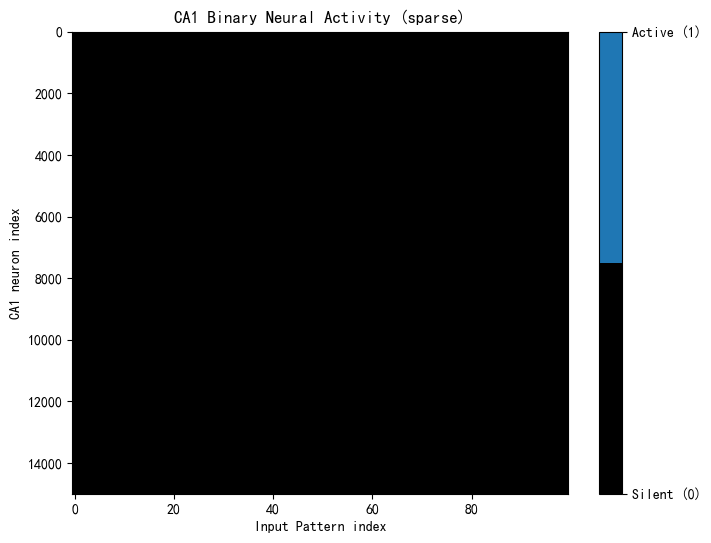

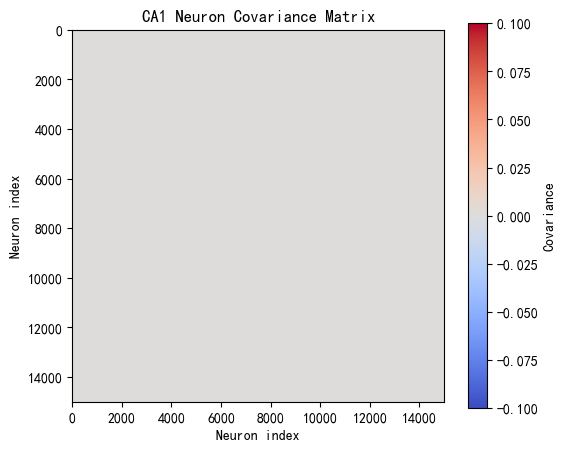

In [ ]:

plt.figure(figsize=(8, 6))

from matplotlib.colors import ListedColormap

blue_map = ListedColormap(["#000000", "#1f77b4"])  # 黑=0, 蓝=1
plt.imshow(responses, aspect='auto', cmap=blue_map, vmin=0, vmax=1)


plt.xlabel("Input Pattern index")
plt.ylabel("CA1 neuron index")
plt.title("CA1 Binary Neural Activity (sparse)")


cbar = plt.colorbar(ticks=[0, 1])
cbar.ax.set_yticklabels(['Silent (0)', 'Active (1)'])
plt.show()



# 每个神经元的响应向量求协方差
cov_matrix = np.cov(responses)

plt.figure(figsize=(6, 5))
plt.imshow(cov_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.title("CA1 Neuron Covariance Matrix")
plt.xlabel("Neuron index")
plt.ylabel("Neuron index")
plt.show()
